## Import Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as ts

from arch import arch_model
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
from random import gauss
from random import seed
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# seed pseudorandom number generator
seed(1)

# create dataset
mydata=pd.read_csv("mly833.csv")
mydata

data=mydata['rain']
data

0      193.0
1      295.4
2      127.9
3      106.1
4       53.9
       ...  
717    221.9
718    166.3
719    152.0
720    142.5
721    217.3
Name: rain, Length: 722, dtype: float64

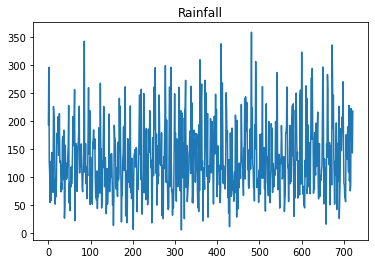

In [2]:
pyplot.plot(data)
pyplot.title("Rainfall")
pyplot.show()

## Data Converted to log format to smooth out extreme values and reduce volatility

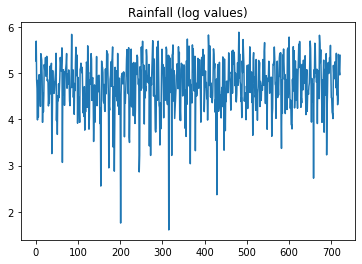

In [3]:
data=np.log(data)
pyplot.plot(data)
pyplot.title("Rainfall (log values)")
pyplot.show()

Text(0.5, 1.0, '3-month Rolling Variance: All Data')

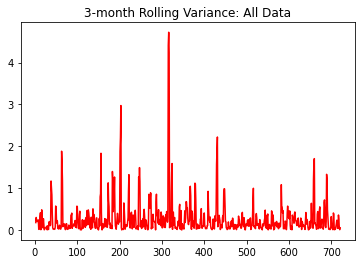

In [4]:
data.rolling(window=3).var().plot(style='r')
pyplot.title("3-month Rolling Variance: All Data")

## Data is first differenced to approximate a Gaussian distribution

In [5]:
data=np.diff(data,1)
data

array([ 4.25640181e-01, -8.37081662e-01, -1.86866663e-01, -6.77251568e-01,
        8.55480564e-01, -7.94310418e-01,  7.53258376e-01,  1.62683255e-01,
       -2.21922230e-01,  1.72865152e-02, -4.81552495e-01,  1.13937880e+00,
       -6.03749859e-02, -8.04749872e-02, -3.73532791e-01, -9.69265586e-01,
        6.32644860e-01, -4.05984994e-01,  3.54801115e-01,  6.65413845e-01,
       -1.02365381e-01,  6.51224628e-02,  1.91232890e-01, -4.05224057e-01,
        3.20198112e-02,  3.98907708e-01, -5.25659413e-01,  2.27907703e-02,
       -6.66645817e-02, -5.01730894e-01,  1.98423504e-01, -1.38525362e-01,
        7.48437644e-01,  5.12321678e-02, -5.97942592e-01,  4.90127136e-01,
        1.69191316e-01, -1.95193591e+00,  5.92051064e-01,  1.20226923e+00,
       -4.56287387e-01,  2.23345347e-01, -2.60348541e-01,  5.40121082e-02,
        1.70178016e-01,  1.19733712e-01,  1.51283066e-01,  3.71937581e-01,
       -1.45409380e+00,  5.10825624e-01, -8.09236736e-01,  8.31584034e-01,
       -1.05974578e-01,  

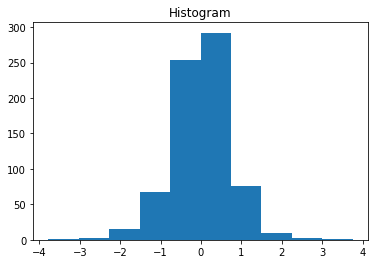

In [6]:
# plot
pyplot.hist(data)
pyplot.title("Histogram")
pyplot.show()

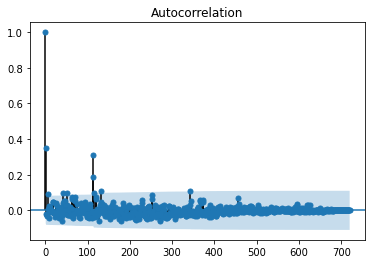

In [7]:
squared_data = [x**2 for x in data]
# create acf plot
plot_acf(squared_data)
pyplot.show()

## QQ Plot: Visual Screening for Normality

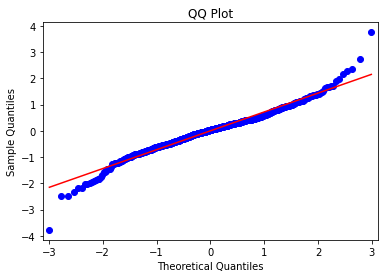

In [8]:
seed(1)
qqplot(data, line='s')
pyplot.title("QQ Plot")
pyplot.show()

## ARCH Modelling

In [9]:
n_test = 10
train, test = data[:-n_test], data[-n_test:]
model = arch_model(train, mean='Zero', vol='ARCH', p=100) # where p = number of lag variances

In [10]:
model

Zero Mean(constant: no, no. of exog: 0, volatility: ARCH(p: 100), distribution: Normal distribution), id: 0x7ff36a0ab3c8

In [11]:
train

array([ 4.25640181e-01, -8.37081662e-01, -1.86866663e-01, -6.77251568e-01,
        8.55480564e-01, -7.94310418e-01,  7.53258376e-01,  1.62683255e-01,
       -2.21922230e-01,  1.72865152e-02, -4.81552495e-01,  1.13937880e+00,
       -6.03749859e-02, -8.04749872e-02, -3.73532791e-01, -9.69265586e-01,
        6.32644860e-01, -4.05984994e-01,  3.54801115e-01,  6.65413845e-01,
       -1.02365381e-01,  6.51224628e-02,  1.91232890e-01, -4.05224057e-01,
        3.20198112e-02,  3.98907708e-01, -5.25659413e-01,  2.27907703e-02,
       -6.66645817e-02, -5.01730894e-01,  1.98423504e-01, -1.38525362e-01,
        7.48437644e-01,  5.12321678e-02, -5.97942592e-01,  4.90127136e-01,
        1.69191316e-01, -1.95193591e+00,  5.92051064e-01,  1.20226923e+00,
       -4.56287387e-01,  2.23345347e-01, -2.60348541e-01,  5.40121082e-02,
        1.70178016e-01,  1.19733712e-01,  1.51283066e-01,  3.71937581e-01,
       -1.45409380e+00,  5.10825624e-01, -8.09236736e-01,  8.31584034e-01,
       -1.05974578e-01,  

In [12]:
test

array([ 0.74506586, -0.89798159,  0.17672638, -0.39019764,  0.11718868,
        0.97022026, -0.28843344, -0.08991287, -0.06453852,  0.42193689])

In [13]:
model_fit = model.fit()
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:    103,   Neg. LLF: 772.2689908279483
Iteration:      2,   Func. Count:    209,   Neg. LLF: 770.6703729413227
Iteration:      3,   Func. Count:    313,   Neg. LLF: 761.8630158279498
Iteration:      4,   Func. Count:    417,   Neg. LLF: 752.7720490516105
Iteration:      5,   Func. Count:    521,   Neg. LLF: 748.3354530473887
Iteration:      6,   Func. Count:    625,   Neg. LLF: 744.1584106524948
Iteration:      7,   Func. Count:    729,   Neg. LLF: 741.2749399757113
Iteration:      8,   Func. Count:    833,   Neg. LLF: 738.3760011568265
Iteration:      9,   Func. Count:    937,   Neg. LLF: 736.8499930975998
Iteration:     10,   Func. Count: 1.04e+03,   Neg. LLF: 734.6659248107765
Iteration:     11,   Func. Count: 1.14e+03,   Neg. LLF: 732.8939151744243
Iteration:     12,   Func. Count: 1.25e+03,   Neg. LLF: 732.138133887674
Iteration:     13,   Func. Count: 1.35e+03,   Neg. LLF: 730.4621760232875
Iteration:     14,   Func. Count: 1.46e+03,   Neg. LLF: 7

In [14]:
yhat

In [15]:
type(yhat)

arch.univariate.base.ARCHModelForecast

In [16]:
test
test=pd.DataFrame(test)

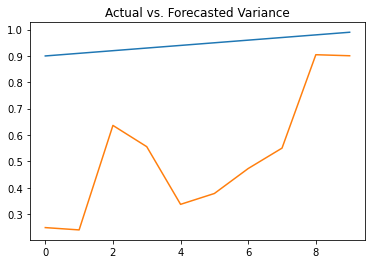

In [17]:
# actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.title("Actual vs. Forecasted Variance")
pyplot.show()

## References

### [- Machine Learning Mastery: How to Model Volatility with ARCH and GARCH for Time Series Forecasting in Python](https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/)

### [- Met Eireann - Irish Weather Data](https://www.met.ie/climate/available-data/historical-data)